## Ridge Regression (L2)

- Ridge Regression is a linear regression technique that adds a regularization term to the ordinary least squares (OLS) cost function to prevent overfitting and improve the stability of the model.

- Ridge regression is a powerful tool to handle multicorrelation and improve the stability and accuracy of linear regression models in various data scenarios. However, if variable selection is a priority, other regularization techniques like Lasso or Elastic Net may be more appropriate.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# Generate some synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
# Define a range of lambda (alpha) values to test
lambda_values = [0, 0.01, 0.1, 1, 10, 100]

# Train the Ridge Regression model with different lambda values
train_errors = []
test_errors = []

for alpha in lambda_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

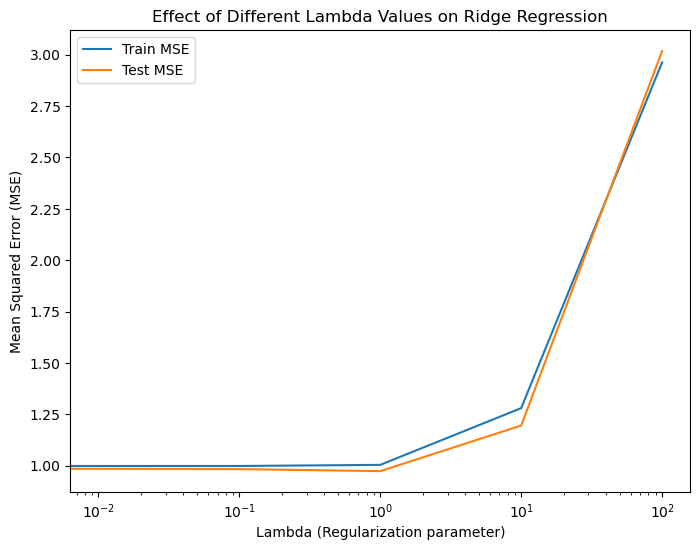

In [7]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(lambda_values, train_errors, label='Train MSE')
plt.plot(lambda_values, test_errors, label='Test MSE')
plt.xlabel('Lambda (Regularization parameter)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xscale('log')
plt.legend()
plt.title('Effect of Different Lambda Values on Ridge Regression')
plt.show()

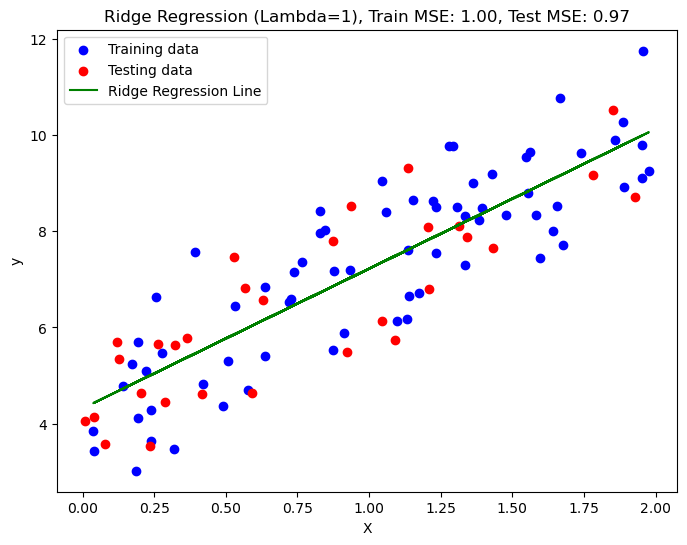

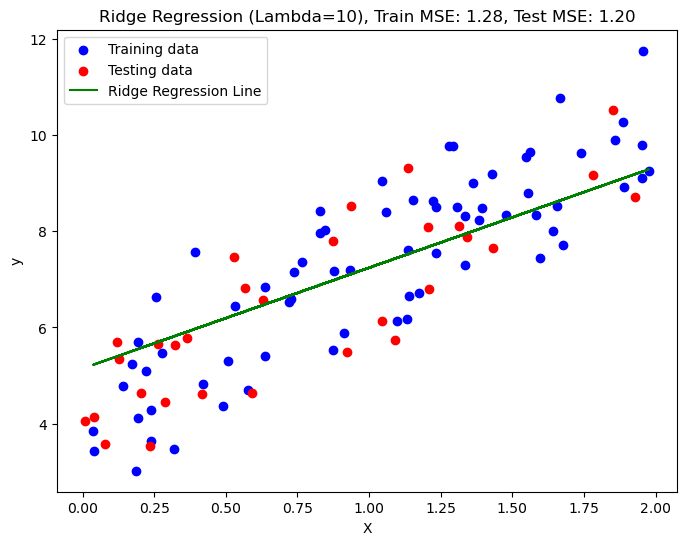

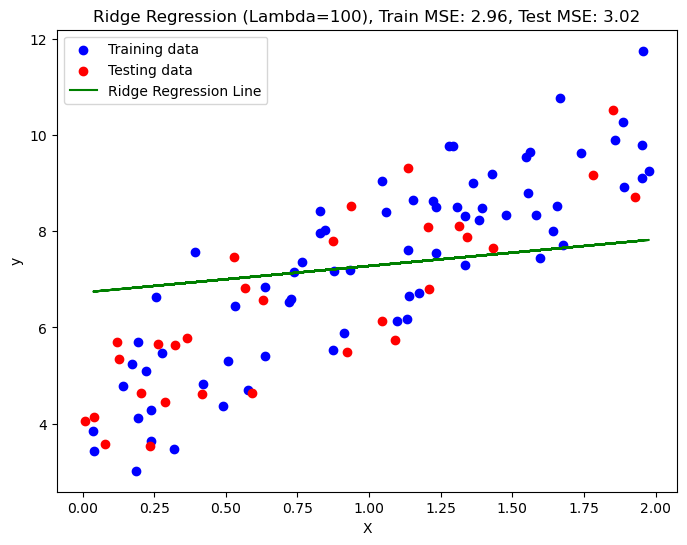

In [11]:
def train_ridge_regression(X_train, y_train, X_test, y_test, alpha):
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    # Visualize the regression line and data points
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='red', label='Testing data')
    plt.plot(X_train, y_train_pred, color='green', label='Ridge Regression Line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Ridge Regression (Lambda={alpha}), Train MSE: {train_error:.2f}, Test MSE: {test_error:.2f}')
    plt.show()

# Test with different lambda values
lambdas_to_test = [1, 10, 100]

for alpha in lambdas_to_test:
    train_ridge_regression(X_train, y_train, X_test, y_test, alpha)

#### Interpretation

&#8594; Lambda=1, Train MSE=1.00, Test MSE=1.97

- With a lambda value of 1, the model is less regularized, leading to a training MSE of 1.00 and a higher testing MSE of 1.97.
- The lower regularization allows the model to fit the training data more closely, resulting in a lower training MSE.
- However, the higher testing MSE suggests that the model might be overfitting the training data and does not generalize well to unseen data. The large gap between the training and testing MSE indicates overfitting.

&#8594; Lambda=10, Train MSE=1.28, Test MSE=1.20

- With a lambda value of 10, the model is moderately regularized, leading to a training MSE of 1.28 and a testing MSE of 1.20.
- The lower regularization compared to lambda=100 allows the model to capture more of the data's patterns, resulting in lower MSE values for both the training and testing sets.
- This lambda value seems to provide a better balance between model complexity and generalization, as both training and testing MSEs are lower than the next case (lambda=100).

&#8594; Lambda=100, Train MSE=2.96, Test MSE=3.02

- With a lambda value of 100, the model is highly regularized, resulting in a high training MSE of 2.96 and a slightly lower but still high testing MSE of 3.02.
- The high regularization indicates that the model is too constrained, and it is likely underfitting the data. Both training and testing MSE are relatively high, suggesting that the model is not able to capture the underlying patterns in the data effectively.